# Ch3. OpenCV를 이용한 영상 데이터 분석 및 처리 기초

1. 영상 데이터 읽기 / 보기 / 쓰기

2. 영상에 선, 박스, 원, 텍스트 그리기 

3. 차영상을 구해서 움직이는 물체 찾아 

4. 차영상을 이진화해서 노이즈 제거하고 이동한 물체 찾아 보기

5. 필터링 적용하여 노이즈 제거하기

In [1]:
# Google Colab 환경일 경우 아래 플래그를 True로 설정할 것
DL_GOOGLE_COLAB_ENV = False

if DL_GOOGLE_COLAB_ENV == True:
    DL_LOCAL_PC_ENV = False
else:
    DL_LOCAL_PC_ENV = True

In [2]:
# google colab 실행할 경우, content drive 마운트
if DL_GOOGLE_COLAB_ENV:
    from google.colab import drive
    drive.mount('/content/drive')
    print('mounting content/drive')

## 1. 영상 데이터 읽기 / 보기 / 쓰기

    img = cv2.imread(filename)
    hist = cv2.calcHist([img], [0], None, [256], [0,256])
    cv2.imshow("Title: img",img)
    cv2.imwrite(filename, img)

### (1) 영상 데이터 읽기

In [3]:
# 영상 데이터 읽기

import cv2
import sys

if DL_GOOGLE_COLAB_ENV: # google colab 환경일 경우,
    filename = "/content/drive/MyDrive/Colab Notebooks/scam0001.png"
else: # local pc 환경일 경우
    # filename = "../Data/scam0001.png"
    filename = "../Data/profile.jpg"

img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
if img_color is None or img_gray is None:
    print('이미지를 불러오는데 실패했습니다!')
    sys.exit()

# 영상 데이터 만들기
img_color_make = cv2.imread(filename, cv2.IMREAD_COLOR)
img_gray_make = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
if img_color_make is None or img_gray_make is None:
    print('이미지를 불러오는데 실패했습니다!')
    sys.exit()


# for문을 이용한 영상의 픽셀 값 수정
# 매우 느려서 절대 이용하면 안됌, OpenCV or Numpy에서 제공하는 함수 이용하기.
for y in range(img_color.shape[0]):
    for x in range(img_color.shape[1]):
        # y, x 순서인 이유 : 영상 행렬은 높이, 길이로 저장되므로
        img_color_make[y, x] = (0, 0, 255) # x,y 위치의 픽셀을 (0, 0, 255) 빨강색으로 만듬
        img_gray_make[y, x] = 255 # BGR 모두 255 => 하양색

print(f" W = {img_color.shape[1]}, H = {img_color.shape[0]}")
print(img_color[100][50]) # 영상 억세스 인덱스는 [세로][가로]임. 세로 크기 범위 넘어서면 억세스 오류
print(img_gray[100][50])
# print(img_gray[50][9999])  # 오류: 영상의 크기 범위 밖을 억세스

 W = 1024, H = 1024
[232 238 243]
239


### (2) 영상 데이터 보기

In [4]:
# 영상 데이터 보기

if DL_GOOGLE_COLAB_ENV: # google colab 환경일 경우,
    from google.colab.patches import cv2_imshow

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(img_color)
    cv2_imshow(img_gray)
    cv2_imshow(img_color_make)
    cv2_imshow(img_gray_make)
else:
    cv2.namedWindow("color image", cv2.WINDOW_AUTOSIZE) 
    cv2.resizeWindow("color image", 1080, 720)
    # cv2.moveWindow("color image", 200, 200)
    cv2.imshow("color image", img_color)

    cv2.namedWindow("gray image", cv2.WINDOW_NORMAL) 
    cv2.resizeWindow("gray image", 1080, 720)
    # cv2.moveWindow("gray image", 200, 200)
    cv2.imshow("gray image", img_gray)
    
    cv2.namedWindow("color image make", cv2.WINDOW_AUTOSIZE) 
    cv2.resizeWindow("color image make", 1080, 720)
    # cv2.moveWindow("color image make", 200, 200)
    cv2.imshow("color image make", img_color_make)

    cv2.namedWindow("gray image make", cv2.WINDOW_NORMAL) 
    cv2.resizeWindow("gray image make", 1080, 720)
    # cv2.moveWindow("gray image make", 200, 200)
    cv2.imshow("gray image make", img_gray_make)

    cv2.waitKey(0)
    cv2.destroyAllWindows()


### (3) 영상 데이터의 히스토그램 보기

<p>
<img src="../Data/img_to_histo1.png", height="200x", width="800px">
</p>

<p>
<img src="../Data/calcHist함수.png", height="300x", width="600px">
</p>


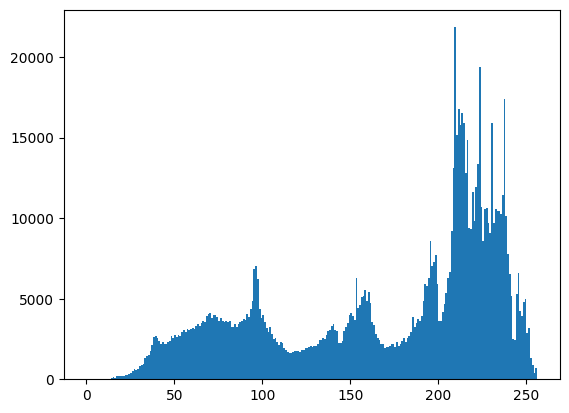

In [5]:
# 영상의 밝기값 히스토그램으로 살펴보기
from matplotlib import pyplot as plt

hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

In [6]:
# 영상 데이터 저장하기

if DL_GOOGLE_COLAB_ENV:
    file_saved1 = "/content/drive/MyDrive/Colab Notebooks/test.jpg"
    file_saved2 = "/content/drive/MyDrive/Colab Notebooks/test.bmp"
    file_saved3 = "/content/drive/MyDrive/Colab Notebooks/test.png"
else:
    file_saved1 = "../output/test_color.jpg"
    file_saved2 = "../output/test_color.bmp"
    file_saved3 = "../output/test_color.png"

cv2.imwrite(file_saved1, img_color)
cv2.imwrite(file_saved2, img_color)
cv2.imwrite(file_saved3, img_color)

True

## 2. 영상에 선, 박스, 원, 텍스트 그리기 

1. 영상에 선 그리기

    선 그리기 함수 : cv2.line()
    
         cv2.line(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)
         
            img : 그림을 그릴 영상

            pt1, pt2 : 직선의 시작점과 끝점. (x, y) 튜플

            color : 선 색상 또는 밝기. (R, G, B) 튜플 또는 정수값

            thickness : 선 두께. 기본값은 1

            lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택

            shift : 그리기 좌표 값의 축소 비율. 기본값은 0

2. 영상에 박스 그리기

    박스 그리기 함수 : cv2.rectangle()

        cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None)

        cv2.rectangle(img, rec, color, thickness=None, lineType=None, shift=None)

            img : 그림을 그릴 영상

            pt1, pt2 : 사각형의 두 꼭지점 좌표. (x, y) 튜플

            rec : 사각형 위치 정보. (x, y, w, h) 튜플

            color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수값

            thickness : 선 두께. 기본값은 1. 음수(-1)를 지정하면 내부를 채움.

            shift : 그리기 좌표 값의 축소 비율. 기본값은 0


3. 영상에 원 그리기

    영상에 원 그리기 함수 : cv2.circle()

        cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)

            img : 그림을 그릴 영상

            center : 원의 중심 좌표. (x, y) 튜플

            radius : 원의 반지름

            color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수값.

            thickness : 선 두께. 기본값은 1, 음수(-1)를 지정하면 내부를 채움

            lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택

            shift : 그리기 좌표 값의 축소 비율. 기본값은 0            


4. 영상에 텍스트 그리기

    영상에 텍스트 그리기 함수 : cv2.putText()

        cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None)

            img : 그림을 그릴 영상

            text : 출력할 문자열

            org : 영상에서 문자열을 출력할 위치의 좌측 하단 좌표. (x, y) 튜플

            fontFace : 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택

            fontScale : 폰트 크기 확대/축소 비율

            color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수값.

            thickness : 선 두께. 기본값은 1, 음수(-1)를 지정하면 내부를 채움

            lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택

            bottomLeftOrigin : True이면 영상 좌측 하단을 원점으로 간주. 기본값은 False



In [12]:
# 영상에 선, 박스, 원, 텍스트 그리기 
import cv2
import numpy as np
import sys

if DL_GOOGLE_COLAB_ENV:
    img = cv2.imread('/content/drive/MyDrive/w3_example/images/circuit1.png', cv2.IMREAD_COLOR)
else:
    img = cv2.imread('../Data/profile.jpg', cv2.IMREAD_COLOR)

if img is None:
    print('이미지를 불러오는데 실패했습니다!')
    sys.exit()

# 직선 그리기
cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 5) # 빨간색, 두께 5
cv2.line(img, (50, 60), (150, 160), (255, 0, 0))   # 파란색

# 사각형 그리기
cv2.rectangle(img, (50, 500, 150, 100), (0, 255, 0), 2) # 녹색, 두께 2
cv2.rectangle(img, (70, 520), (180, 280), (0, 128, 0), -1) # -1은 내부 색 칠하기

# 원 그리기
cv2.circle(img, (450, 100), 30, (255, 255, 0), -1, cv2.LINE_AA) # 반지름 30, 내부 색 칠하기
cv2.circle(img, (450, 100), 60, (255, 0, 0), 3, cv2.LINE_AA) # 반지름 60

# 우선 출력할 텍스트 문자열을 지정해줍니다.
text = 'Hello? OpenCV ' + cv2.__version__

cv2.putText(img, text, (50, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
            (0, 0, 255), 1, cv2.LINE_AA)

# 영상 출력
if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(img)
else:
    cv2.namedWindow("resized window", cv2.WINDOW_AUTOSIZE)  
    cv2.imshow("resized window", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 3. 차영상을 구해서 움직이는 물체 찾아 보기

    img3 = cv2.absdiff(img1, img2)

In [20]:
if DL_GOOGLE_COLAB_ENV:
    filename1 = "/content/drive/MyDrive/Colab Notebooks/scam0001.png"
    filename2 = "/content/drive/MyDrive/Colab Notebooks/scam0002.png"
else:
    filename1 = "../Data/scam0001.png"
    filename2 = "../Data/scam0002.png"

img1 = cv2.imread(filename1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(filename2, cv2.IMREAD_GRAYSCALE)

# 차영상 구하기 img3 = |img1 - img2|
img3 = cv2.absdiff(img1, img2)

# img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# 밝기값 조정 - 어두운 영상을 밝게 조정
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(img3)
print(f'max value in img3 = {maxVal} @ {maxLoc}, \nmin value in img3 = {minVal} @ {minLoc}')
img3 = img3 * int(255/(maxVal-minVal))

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(img3)
else:
    cv2.namedWindow("absdiff", cv2.WINDOW_AUTOSIZE)  
    cv2.imshow("absdiff", img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

max value in img3 = 46.0 @ (333, 62), 
min value in img3 = 0.0 @ (0, 0)


## 4. 차영상을 이진화해서 노이즈 제거하고 이동한 물체 찾아 보기

    val, detect_img = cv2.threshold(diff, 5, 255, cv2.THRESH_BINARY)

In [17]:
# 차영상 구하기 img3 = |img1 - img2|
img3 = cv2.absdiff(img1, img2)

# 차영상에 대해 Th = 10으로 이진화
val, bin_img = cv2.threshold(img3, 10, 255, cv2.THRESH_BINARY)

print(f"Threshold value = {val}")

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(bin_img)
else:
    cv2.namedWindow("threshold", cv2.WINDOW_NORMAL)  
    cv2.imshow("threshold", bin_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Threshold value = 10.0


## 5. 필터링 적용하여 노이즈 제거하기

모폴로지 필터

- 침식                

<p>
<img src="../Data/erode.png", height="400x", width="800px">
</p>

    노이즈 제거 효과

    겹쳐 있는 물체를 서로 떼는데 효과

<p>
<img src="../Data/erode_result.png", height="300x", width="400px">
</p>
    


In [29]:
# 노이즈 있는 이진영상에서 노이즈 제거하기
import cv2
import numpy as np

if DL_GOOGLE_COLAB_ENV:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/morph_dot.png')
else:
    img = cv2.imread('../Data/morph_dot.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 침식 연산 적용 ---②
erosion = cv2.erode(img, k)

# 결과 출력 (원이미지 : 결과이미지)
merged = np.hstack((img, erosion))

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(merged)
else:
    cv2.namedWindow("Erode", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO | cv2.WINDOW_GUI_EXPANDED)  
    cv2.imshow('Erode', merged)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

- 팽창

<p>
<img src="../Data/dilate.png", height="400x", width="800px">
</p>

    내부 노이즈 제거

    뚱뚱해 진 결과

<p>
<img src="../Data/dilate_result.png", height="300x", width="400px">
</p>
    

In [31]:
import cv2
import numpy as np

if DL_GOOGLE_COLAB_ENV:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/morph_hole.png')
else:
    img = cv2.imread('../Data/morph_hole.png')

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 팽창 연산 적용 ---②
dst = cv2.dilate(img, k)

# 결과 출력
merged = np.hstack((img, dst))

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(merged)
else:
    cv2.namedWindow("Dilation", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO | cv2.WINDOW_GUI_EXPANDED)  
    cv2.imshow('Dilation', merged)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


- 열림 = 침식 + 팽창

<p>
<img src="../Data/opening.png", height="300x", width="600px">
</p>
    
        * Grayscale 영상에 대한 처리
        * 주변보다 밝은 노이즈를 제거하는데 효과적
        * 닿아 있는 것처럼 보이는 독립된 개체를 분리 돌출된 모양을 제거하는 데 효과적





- 닫힘 = 팽창 + 침식
<p>
<img src="../Data/closing.png", height="300x", width="600px">
</p>
    
        * Grayscale 영상에 대한 처리
        * 주변보다 어두운 노이즈를 제거하는데 효과적                
        * 끊어져 보이는 개체를 연결하거나 구멍을 메우는 데 효과적


In [21]:
import cv2
import numpy as np

if DL_GOOGLE_COLAB_ENV:
    img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/morph_dot.png', cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/morph_hole.png', cv2.IMREAD_GRAYSCALE)    
else:
    img1 = cv2.imread('../Data/morph_dot.png', cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread('../Data/morph_hole.png', cv2.IMREAD_GRAYSCALE)    


# 구조화 요소 커널, 사각형 (5x5) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# 열림 연산 적용 ---②
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, k)
# 닫힘 연산 적용 ---③
closing = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, k)

# 결과 출력
merged1 = np.hstack((img1, opening))
merged2 = np.hstack((img2, closing))
merged3 = np.vstack((merged1, merged2))

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(merged3)
else:
    cv2.namedWindow("Opening & closing", cv2.WINDOW_NORMAL)  
    cv2.imshow('Opening & closing', merged3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


- 그래디언트 = 팽창 - 침식

        * 경계 검출과 유사

In [22]:
import cv2
import numpy as np

if DL_GOOGLE_COLAB_ENV:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/morphological.png', cv2.IMREAD_GRAYSCALE)
else:
    img = cv2.imread('../Data/morphological.png', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 그래디언트 연산 적용 ---②
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)

# 결과 출력
merged = np.hstack((img, gradient))

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(merged)
else:
    cv2.namedWindow("Gradient", cv2.WINDOW_NORMAL)  
    cv2.imshow('Gradient', merged)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

- 탑햇 = 원본 - 열림

        * 값이 크게 튀는 밝은 영역을 강조할 수 있음

- 블랙햇 = 닫힘 - 원본

        * 어둡게 튀는 영역을 강조할 수 있음

In [23]:
import cv2
import numpy as np

if DL_GOOGLE_COLAB_ENV:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/moon_gray.jpg', cv2.IMREAD_GRAYSCALE)
else:
    # img = cv2.imread('../Data/moon_gray.jpg', cv2.IMREAD_GRAYSCALE)    
    # img = cv2.imread('../Data/scam0002.png', cv2.IMREAD_GRAYSCALE)
    img = cv2.imread('../Data/cam0002.png', cv2.IMREAD_GRAYSCALE)

# 구조화 요소 커널, 사각형 (3x3) 생성 ---①
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# k = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
# k = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))

# 탑햇 연산 적용 ---②
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
# 블랫햇 연산 적용 ---③
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

min1, maxValTop, _, _ = cv2.minMaxLoc(tophat)
min2, maxValBlack, _, _ = cv2.minMaxLoc(blackhat)
print(min1, min2, maxValTop, maxValBlack)

# 밝기값 조정
tophat = tophat * int(255./maxValTop)
blackhat = blackhat * int(255./maxValBlack)
combined = tophat*int(255./(2*maxValTop)) + blackhat*int(255./(2*maxValBlack))

# 결과 출력
merged = np.hstack((img, tophat, blackhat, combined))

if DL_GOOGLE_COLAB_ENV:
    cv2_imshow(merged)    
else:
    cv2.namedWindow("tophat blackhat", cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO | cv2.WINDOW_GUI_EXPANDED)  
    cv2.imshow('tophat blackhat', merged)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

0.0 0.0 70.0 82.0
